In [1]:
# Importação Packages
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Importação Dataset
df = pd.read_excel('NASA Kepler Expoplanets.xlsx')

In [3]:
# Tamanho do dataset
df.shape

(9564, 49)

In [4]:
# Transformação do Target Feature usando Label Encoding
label_encoder = preprocessing.LabelEncoder() # Criar o objeto de Label Encoding

df['target_koi_pdisposition'] = label_encoder.fit_transform(df['koi_pdisposition'])
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,target_koi_pdisposition
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,10000.000,0,0,0,0,...,4467.0,0.064,-0.096,0.927,0.105,-0.061,291934230,48141651,15347.0,0
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4467.0,0.064,-0.096,0.927,0.105,-0.061,291934230,48141651,15347.0,0
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4544.0,0.044,-0.176,0.868,0.233,-0.078,297004820,48134129,15436.0,0
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4564.0,0.053,-0.168,0.791,0.201,-0.067,285534610,48285210,15597.0,1
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,10000.000,0,0,0,0,...,4438.0,0.070,-0.210,10460.000,0.334,-0.133,288754880,48226200,15509.0,0


In [5]:
# Eliminação de colunas/atributos
df.drop(columns=['kepid','kepoi_name','kepler_name','koi_disposition','koi_tce_delivname','koi_period_err1','koi_period_err2','koi_time0bk_err1','koi_time0bk_err2','koi_impact_err1','koi_impact_err2','koi_duration_err1','koi_duration_err2','koi_depth_err1','koi_depth_err2','koi_prad_err1','koi_prad_err2','koi_teq_err1','koi_teq_err2','koi_insol_err1','koi_insol_err2','koi_steff_err1','koi_steff_err2','koi_slogg_err1','koi_slogg_err2','koi_srad_err1','koi_srad_err2'], inplace=True)

In [6]:
# Novo tamanho do dataset
df.shape

(9564, 23)

In [7]:
# Identificação valores NA ou NaN.
df.isna().sum()

koi_pdisposition              0
koi_score                  1510
koi_fpflag_nt                 0
koi_fpflag_ss                 0
koi_fpflag_co                 0
koi_fpflag_ec                 0
koi_period                    0
koi_time0bk                   0
koi_impact                  363
koi_duration                  0
koi_depth                   363
koi_prad                    363
koi_teq                     363
koi_insol                   321
koi_model_snr               363
koi_tce_plnt_num            346
koi_steff                   363
koi_slogg                   363
koi_srad                    363
ra                            0
dec                           0
koi_kepmag                    1
target_koi_pdisposition       0
dtype: int64

In [8]:
# Eliminação de observações com valores ausentes
df.dropna(inplace=True)

In [9]:
# Novo tamanho do dataset
df.shape

(7994, 23)

In [10]:
# Verificar se os atributos com valores binários contêm valores fora de padrão
df['koi_fpflag_nt'].value_counts()

0      7165
1       828
465       1
Name: koi_fpflag_nt, dtype: int64

In [11]:
df['koi_fpflag_ss'].value_counts()

0    5849
1    2145
Name: koi_fpflag_ss, dtype: int64

In [12]:
df['koi_fpflag_co'].value_counts()

0    6223
1    1771
Name: koi_fpflag_co, dtype: int64

In [13]:
df['koi_fpflag_ec'].value_counts()

0    6913
1    1081
Name: koi_fpflag_ec, dtype: int64

In [14]:
# Tratamento do valor fora do padrão do atributo koi_fpflag_nt
df.loc[(df.koi_fpflag_nt != 0)&(df.koi_fpflag_nt != 1),'koi_fpflag_nt'] = df['koi_fpflag_nt'].value_counts().idxmax()
df['koi_fpflag_nt'].value_counts()

0    7166
1     828
Name: koi_fpflag_nt, dtype: int64

0.000        3432
10000.000    1774
0.999         229
0.998         143
0.997         101
             ... 
0.265           1
0.769           1
0.181           1
0.680           1
0.058           1
Name: koi_score, Length: 649, dtype: int64

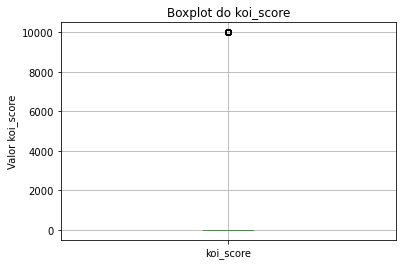

In [15]:
# Visualização dos valores do atributo koi_score fora do intervalo
df.boxplot(column='koi_score')
plt.title("Boxplot do koi_score")
plt.ylabel("Valor koi_score")

df['koi_score'].value_counts()

In [16]:
# Tratamento do valor fora do padrão do atributo koi_score
df.loc[(df.koi_score > 1), 'koi_score'] = 1

Text(0, 0.5, 'Valor koi_score')

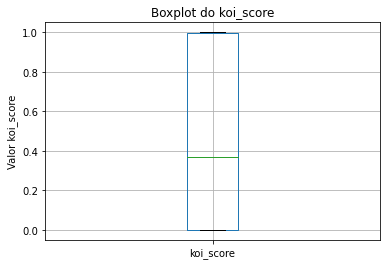

In [17]:
# Visualização dos valores do atributo koi_score após tratamento
df.boxplot(column='koi_score')

plt.title("Boxplot do koi_score")
plt.ylabel("Valor koi_score")

In [18]:
#  Explorar o dataset - função .describe()
df.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,target_koi_pdisposition
count,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7.994000e+03,7.994000e+03,7994.000000,7.994000e+03,7.994000e+03,...,7.994000e+03,7994.000000,7994.000000,7994.000000,7994.000000,7.994000e+03,7.994000e+03,7.994000e+03,7994.000000,7994.000000
mean,0.483829,0.103578,0.268326,0.221541,0.135226,3.703675e+10,1.576545e+09,2197.211778,5.352545e+05,2.664866e+08,...,8.124302e+03,294.795334,1.240055,5691.418064,4317.987703,1.309289e+04,2.920884e+08,4.381603e+07,14317.878534,0.487866
std,0.477009,0.304731,0.443116,0.415310,0.341987,8.671153e+10,5.773999e+08,8121.092370,6.323300e+05,8.504829e+08,...,1.689601e+05,845.134235,0.650124,788.322057,436.736652,6.491070e+04,4.786094e+06,3.603581e+06,1366.926526,0.499884
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.598197e-01,1.205659e+09,0.000000,5.200000e-02,0.000000e+00,...,2.000000e-02,0.000000,1.000000,2661.000000,0.047000,1.090000e-01,2.798561e+08,3.657738e+07,6966.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.421038e+09,1.325975e+09,0.216000,2.414150e+05,1.624000e+06,...,3.316000e+01,14.300000,1.000000,5312.000000,4229.000000,8.270000e-01,2.886992e+08,4.078408e+07,13506.250000,0.000000
50%,0.371000,0.000000,0.000000,0.000000,0.000000,7.582527e+09,1.359549e+09,0.582500,3.733650e+05,4.491500e+06,...,1.833250e+02,27.500000,1.000000,5761.000000,4438.000000,9.970000e-01,2.923047e+08,4.367880e+07,14575.000000,0.000000
75%,0.999000,0.000000,1.000000,0.000000,0.000000,2.381556e+10,1.589050e+09,0.909000,5.959750e+05,1.996200e+07,...,1.003577e+03,100.075000,1.000000,6098.000000,4544.000000,1.316000e+04,2.959062e+08,4.672281e+07,15341.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.071233e+12,1.472522e+10,252240.000000,1.385400e+07,9.216700e+09,...,1.094755e+07,9054.700000,8.000000,15896.000000,5364.000000,2.299080e+06,3.017208e+08,5.233601e+07,20003.000000,1.000000


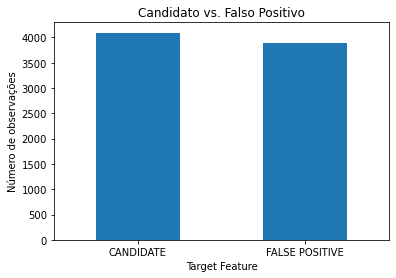

In [19]:
# Visualização Target Feature
df.koi_pdisposition.value_counts().plot(kind="bar")
plt.title("Candidato vs. Falso Positivo")
plt.xlabel("Target Feature")
plt.xticks(rotation=0)
plt.ylabel("Número de observações")
plt.show()

In [20]:
# Remover o target feature que previamente foi encoded
df.drop(columns='koi_pdisposition', inplace=True)

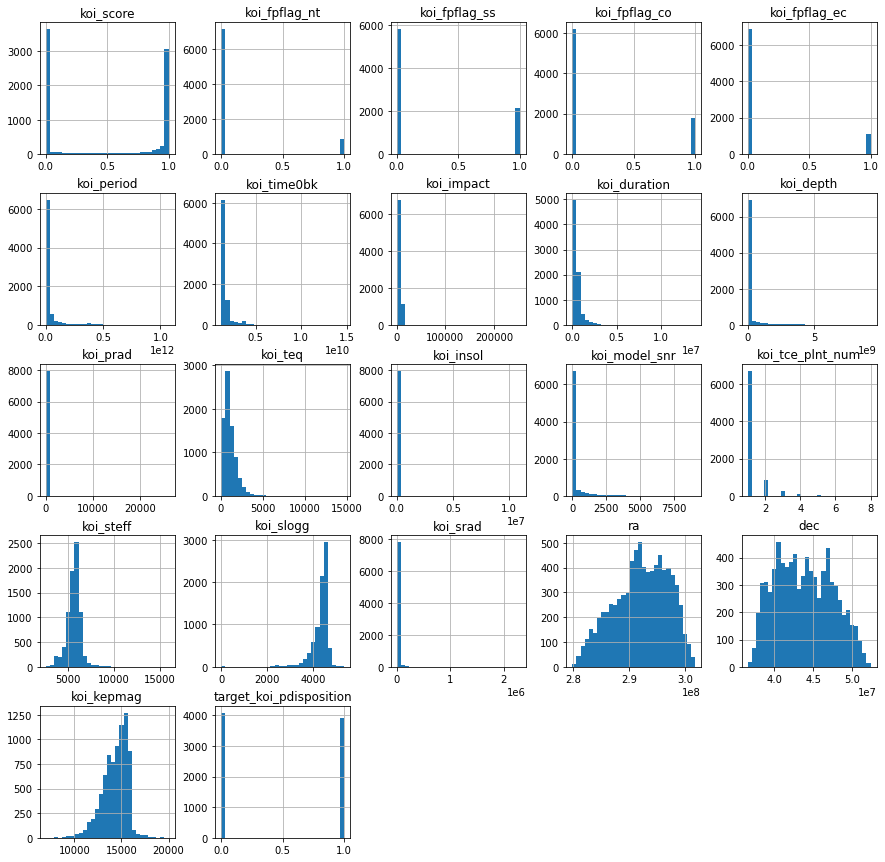

In [21]:
# Gerar histogramas para cada atributo do dataset por fins de explorar os dados
df.hist(bins=30, figsize=(15, 15))
plt.savefig('histogram.png')

In [22]:
# Separação dos features e target feature
features = df.drop(columns=['target_koi_pdisposition'])
target = df.target_koi_pdisposition

In [23]:
# Número de subconjuntos
k_folds = KFold(n_splits = 5)

In [24]:
# Primeiro Modelo de Machine Learning - Decision Tree Classifier
model_decision_tree = DecisionTreeClassifier()
scores = cross_val_score(model_decision_tree, features, target, cv=k_folds)

In [25]:
# Resultados Decision Tree Classifier
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.99812383 0.99937461 0.99937461 0.99874922 0.99812265]
Average CV Score:  0.9987489834463185


In [26]:
decision_tree = scores.mean()*100

In [27]:
# Testando o Decision Tree ajustando o parametro max_leaf_nodes
for i in [5, 10, 25, 50, 100]:
    model_decision_tree = DecisionTreeClassifier(max_leaf_nodes = i)
    scores = cross_val_score(model_decision_tree, features, target, cv=k_folds)
    print("Average CV Score with "+ str(i) +" nodes: ", scores.mean())

Average CV Score with 5 nodes:  0.9702278723952158
Average CV Score with 10 nodes:  0.9792342836300222
Average CV Score with 25 nodes:  0.9989992180657341
Average CV Score with 50 nodes:  0.9992494526851499
Average CV Score with 100 nodes:  0.9989991397940358


In [28]:
# Segundo Modelo de Machine Learning - KNN
model_knn = KNeighborsClassifier()
scores = cross_val_score(model_knn, features, target, cv=k_folds)

In [29]:
# Resultados KNN
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.73608505 0.72295184 0.75484678 0.68042527 0.77659574]
Average CV Score:  0.7341809375540563


In [30]:
knn = scores.mean()*100

In [31]:
for i in [5, 10, 25, 50, 100]:
    model_knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(model_knn, features, target, cv=k_folds)
    print("Average CV Score with "+ str(i) +" nodes: ", scores.mean())

Average CV Score with 5 nodes:  0.7341809375540563
Average CV Score with 10 nodes:  0.7350516319257735
Average CV Score with 25 nodes:  0.722791935823469
Average CV Score with 50 nodes:  0.7090284838537227
Average CV Score with 100 nodes:  0.6998939418488245


In [32]:
# Terceiro Modelo de Machine Learning - Gradient Boosting
model_GB = GradientBoostingClassifier()
scores = cross_val_score(model_GB, features, target, cv=k_folds)

In [33]:
# Resultados GB
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.99624765 1.         0.99937461 0.99812383 0.99937422]
Average CV Score:  0.9986240618158563


In [34]:
gradient_boosting = scores.mean()*100

In [35]:
df2 = pd.DataFrame(index = [1], columns = ["decision_tree", "knn", "gradient_boosting"])

In [36]:
df2.iloc[0,0] = decision_tree
df2.iloc[0,1] = knn
df2.iloc[0,2] = gradient_boosting
df2

,decision_tree,knn,gradient_boosting
1,99.874898,73.418094,99.862406


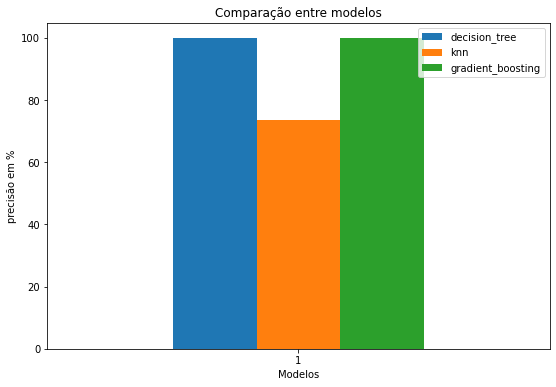

In [37]:
df2.plot(figsize=(9,6), kind="bar")
plt.title("Comparação entre modelos")
plt.xlabel("Modelos")
plt.xticks(rotation=0)
plt.ylabel("precisão em %")
plt.show()